In [148]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import seaborn as sns
data = pd.read_csv(r"C:\Users\USER\Documents\Python Scripts\Datasets\alldata.csv")

In [59]:
data.head(2)

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"


In [60]:
data.shape

(6964, 5)

In [61]:
data.isnull().sum()

position         11
company          11
description      11
reviews        1638
location         11
dtype: int64

In [62]:
data_us = data_us.dropna()

In [63]:
data_us.isnull().sum()

position       0
description    0
dtype: int64

In [64]:
data_us = data[["position","description"]]
data_us.head()

,position,description
0,Development Director,Development Director\nALS Therapy Development ...
1,An Ostentatiously-Excitable Principal Research...,"Job Description\n\n""The road that leads to acc..."
2,Data Scientist,"Growing company located in the Atlanta, GA are..."
3,Data Analyst,DEPARTMENT: Program OperationsPOSITION LOCATIO...
4,Assistant Professor -TT - Signal Processing & ...,DESCRIPTION\nThe Emory University Department o...


In [65]:
#Select Data Analyst postings from the listings
Analyst = data_us[data_us['position'].str.contains("Data Analyst", na = False)] 
Analyst.head()

,position,description
3,Data Analyst,DEPARTMENT: Program OperationsPOSITION LOCATIO...
100,Enterprise Data Analyst & Data Engineer,Role Overview\n\nNovelis is embarking on the j...
287,Data Analyst - Public Education Data Analysis,General Information\n**Minimum salary is liste...
298,Data Analyst,Job Description\nMake a Difference Every Day w...
333,Quantitative Data Analyst,PIMCO is a global investment solutions provide...


In [66]:
#Select Data Scientist postings from the listings
Scientist = data_us[data_us['position'].str.contains("Data Scientist", na=False)] 
Scientist.head()


,position,description
2,Data Scientist,"Growing company located in the Atlanta, GA are..."
9,Senior Associate - Cognitive Data Scientist Na...,Known for being a great place to work and buil...
12,"Senior Associate, Data Scientist",Innovate. Collaborate. Shine. Lighthouse — KPM...
15,Data Scientist,Cotiviti is looking for an industry leading Da...
18,Data Scientist,DATA SCIENTIST\n\nSUMMARY:\nAs an Amazon Web S...


In [67]:
#Select Machine learning postings from the listings
ML = data_us[data_us['position'].str.contains("Machine Learning", na =False)] 
ML.head()

,position,description
4,Assistant Professor -TT - Signal Processing & ...,DESCRIPTION\nThe Emory University Department o...
63,Machine Learning / Artificial Intelligence Res...,(This is an Individual Contributor Role)\n\nCo...
79,"Technical Evangelist – Database, Analytics, an...",Job Description\nDo you love data? Do you like...
122,Mid Data Scientist - Machine Learning,Mid Data Scientist\nOur client in the Midtown ...
133,Tech Fall 2018 Intern - Machine Learning,The Turner Story\n\nTurner is a division of Ti...


In [68]:
#Select Big Data postings from the listings
BD = data_us[data_us['position'].str.contains("Big Data", na  =False)] 
BD.head()

,position,description
124,Big Data SW Engineer,Known for being a great place to work and buil...
136,Data Analytics Engineer / Big Data Engineer,"5 years of hands on experience in Hadoop, HDFS..."
160,Big Data Engineer (mid to senior level),Job Description:\nGreenSky is a leading compan...
407,Big Data Pipeline Software Engineer - Java/Scala,All data has a story to tell Can you help tell...
417,Senior Director of Big Data Science & Analytics,Job description\n\nPosition Purpose:\nProvide ...


In [69]:
Analyst_desc = Analyst["description"]
Analyst_desc.head()

3      DEPARTMENT: Program OperationsPOSITION LOCATIO...
100    Role Overview\n\nNovelis is embarking on the j...
287    General Information\n**Minimum salary is liste...
298    Job Description\nMake a Difference Every Day w...
333    PIMCO is a global investment solutions provide...
Name: description, dtype: object

In [70]:
Analyst_desc.replace('--', np.nan) 


3       DEPARTMENT: Program OperationsPOSITION LOCATIO...
100     Role Overview\n\nNovelis is embarking on the j...
287     General Information\n**Minimum salary is liste...
298     Job Description\nMake a Difference Every Day w...
333     PIMCO is a global investment solutions provide...
362     The Compliance Quantitative Data Analyst plays...
365     Working at ICF\n\n\nWorking at ICF means apply...
784     Data Analyst II - Research - Kenmore - (107687...
1205    About Celect\nCelect is a venture-backed compa...
1277    By joining Eaton Vance, you’ll become part of ...
1281    Being scientific is one of the core values in ...
1301    Do you want to learn how to change the world? ...
1363    At TrueMotion we’re motivated by three things:...
1367    At Affect Mental Health, we’re building a non-...
1371    NORC at the University of Chicago is seeking a...
1424    The Research Data Analyst provides expertise i...
1448    Data Analyst, Chicago, Illinois or Toronto, On...
1459    Resear

In [71]:
Analyst_desc_na = Analyst_desc.dropna()
#Analyst_desc_na

In [72]:
#convert list elements to lower case
Analyst_cleaned_data = [item.lower() for item in Analyst_desc_na]
Analyst_cleaned_data

["department: program operationsposition locations: atlanta, ga.accountability:  president of program operationsfor 25 years operation hope has been dedicated to empowering underserved communities through financial literacy, now our work encompasses more than financial education. our work is about instilling knowledge and confidence in those we serve so they can experience, sometimes for the first time in their lives, financial dignity.job summarythe data analyst collects, organizes, mines, analyzes, and audits large sets of data for impact reporting and operational optimization. the data analyst participates as a team member responsible for maintaining the integrity of client database information and provides executable and actionable recommendations for data migration best practices and field operations based on analytical findings.duties and responsibilitiesinitiate and participate in data mining and reportingaudit and profile the data to assess the impact of poor quality data on th

In [73]:
len(Analyst_cleaned_data)

124

In [74]:
# cnt =0
# for i in Analyst_cleaned_data:
#     if 'developing' in i:
#         cnt+=1
#         print(True)
# print(cnt)

In [ ]:
#remove html links from list
#re.sub(pattern,repl,string)
import re
Analyst_cleaned_data =  [re.sub(r"http\S+", "", item) for item in Analyst_cleaned_data]

In [ ]:
#remove special characters left
Analyst_cleaned_data = [re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", item) for item in Analyst_cleaned_data]


In [82]:
#convert to dataframe
Analyst_cleaned_data = pd.DataFrame(np.array(Analyst_cleaned_data).reshape(-1))
Analyst_cleaned_data

,0
0,department: program operationsposition locatio...
1,role overview\n\nnovelis is embarking on the j...
2,general information\n**minimum salary is liste...
3,job description\nmake a difference every day w...
4,pimco is a global investment solutions provide...
5,the compliance quantitative data analyst plays...
6,working at icf\n\n\nworking at icf means apply...
7,data analyst ii - research - kenmore - (107687...
8,about celect\ncelect is a venture-backed compa...
9,"by joining eaton vance, you’ll become part of ..."


In [83]:
#Squeeze dataframe to obtain series
Analyst_cleaned = Analyst_cleaned_data.squeeze()
Analyst_cleaned

0      department: program operationsposition locatio...
1      role overview\n\nnovelis is embarking on the j...
2      general information\n**minimum salary is liste...
3      job description\nmake a difference every day w...
4      pimco is a global investment solutions provide...
5      the compliance quantitative data analyst plays...
6      working at icf\n\n\nworking at icf means apply...
7      data analyst ii - research - kenmore - (107687...
8      about celect\ncelect is a venture-backed compa...
9      by joining eaton vance, you’ll become part of ...
10     being scientific is one of the core values in ...
11     do you want to learn how to change the world? ...
12     at truemotion we’re motivated by three things:...
13     at affect mental health, we’re building a non-...
14     norc at the university of chicago is seeking a...
15     the research data analyst provides expertise i...
16     data analyst, chicago, illinois or toronto, on...
17     research data analyst as

In [111]:
#import the wordcloud package
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#Define the word cloud function with a max of 200 words
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(10,10), 
                   title = None, title_size=20, image_color=False):
    stopwords = set(STOPWORDS)
    #define additional stop words that are not contained in the dictionary
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)
    #Generate the word cloud
    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    #set the plot parameters
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  


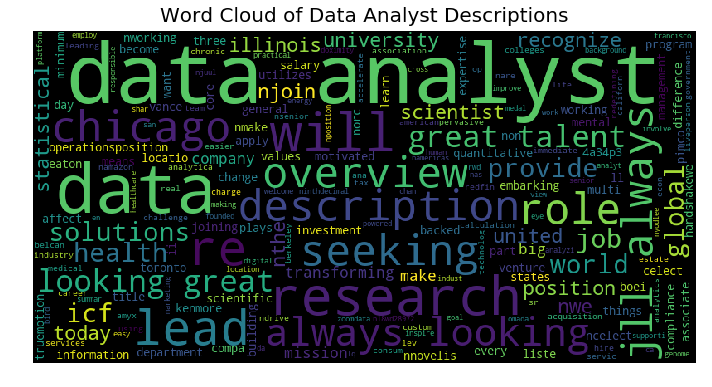

In [112]:
#run the function on the Data Analyst headlines and Remove NA values for clarity of visualisation
plot_wordcloud(Analyst_cleaned_data, title="Word Cloud of Data Analyst Descriptions")


In [107]:
# x = np.array([[[0,1,1,2], 
#                [1,1,1,2],
#                [2,1,1,2]]])
# x.shape
# c = np.squeeze(x)
# b = np.squeeze(x).shape
# #np.squeeze(x, axis=(2,)).shape
# b

In [130]:
data.head(1)

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"


In [131]:
# finding total number of compnaies who require data scientist
total_no_company=data['company'].nunique()
print('Toatl number of firms with data science job vacancies',total_no_company)

Toatl number of firms with data science job vacancies 2213


In [140]:
most_vacancy= data.groupby(['company'])['position'].count()
most_vacancy

company
10x Genomics                          1
1199SEIU Family of Funds              1
1871                                  1
23andMe                              17
24 Hour Fitness                       1
2M Research Services                  1
2U                                    1
2rbConsulting                         2
3D Systems                            1
3Q Digital                            1
605                                   1
6sense                                1
7Cups                                 1
7Park Data                            3
84.51°                                3
A Place for Mom                       2
A+E Networks                          1
A-Line Staffing                       1
A2e Technologies                      1
AARP                                  1
AB Sciex Pte                          1
ACADIA Pharmaceuticals Inc.           1
ACLU                                  4
ACT Commodities                       1
ADMIN FOR CHILDREN'S SVCS       

In [141]:
most_vacancy=most_vacancy.reset_index()
most_vacancy

,company,position
0,10x Genomics,1
1,1199SEIU Family of Funds,1
2,1871,1
3,23andMe,17
4,24 Hour Fitness,1
5,2M Research Services,1
6,2U,1
7,2rbConsulting,2
8,3D Systems,1
9,3Q Digital,1


In [143]:
most_vacancy=most_vacancy.sort_values(['position'],ascending=False)
#most_vacancy

In [145]:
most_vacancy=most_vacancy.head(25)
most_vacancy

,company,position
122,Amazon.com,358
230,Ball Aerospace,187
1270,Microsoft,137
866,Google,134
1328,NYU Langone Health,77
798,Fred Hutchinson Cancer Research Center,70
1095,KPMG,66
1136,Lab126,50
748,Facebook,49
324,Broad Institute,49


In [146]:
print('Top 10 firms with most vacancies',most_vacancy)

Top 10 firms with most vacancies                                      company  position
122                               Amazon.com       358
230                           Ball Aerospace       187
1270                               Microsoft       137
866                                   Google       134
1328                      NYU Langone Health        77
798   Fred Hutchinson Cancer Research Center        70
1095                                    KPMG        66
1136                                  Lab126        50
748                                 Facebook        49
324                          Broad Institute        49
2101                       Walmart eCommerce        45
1248                      McKinsey & Company        41
2040                University of Washington        39
928                                  Harnham        39
1876                   Takeda Pharmaceutical        39
1421                                Oath Inc        34
1512        Pharmacyclics, an Ab

In [134]:
#finding highest number of vacancy in a company
most_vacancy= data.groupby(['company'])['position'].count()
most_vacancy=most_vacancy.reset_index(name='position')
most_vacancy=most_vacancy.sort_values(['position'],ascending=False)
most_vacancy=most_vacancy.head(25)
print('Top 10 firms with most vacancies',most_vacancy)

Top 10 firms with most vacancies                                      company  position
122                               Amazon.com       358
230                           Ball Aerospace       187
1270                               Microsoft       137
866                                   Google       134
1328                      NYU Langone Health        77
798   Fred Hutchinson Cancer Research Center        70
1095                                    KPMG        66
1136                                  Lab126        50
748                                 Facebook        49
324                          Broad Institute        49
2101                       Walmart eCommerce        45
1248                      McKinsey & Company        41
1876                   Takeda Pharmaceutical        39
2040                University of Washington        39
928                                  Harnham        39
1421                                Oath Inc        34
1512        Pharmacyclics, an Ab

Text(0, 0.5, '# OF JOBS')

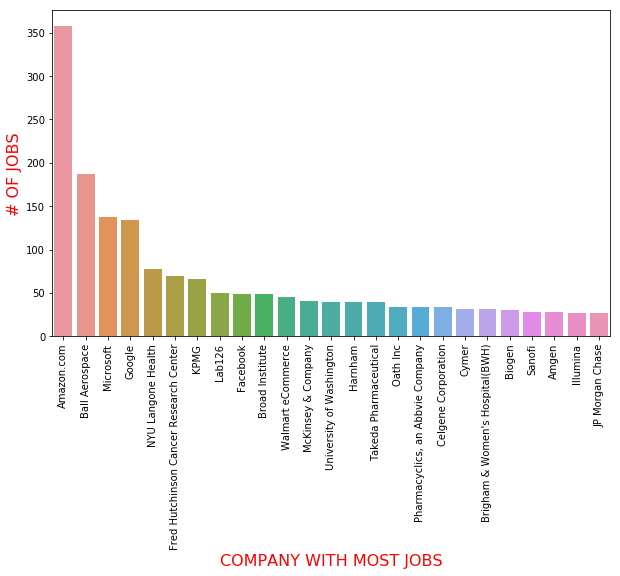

In [151]:
# Plot graph for top most vacancy
fig, ax = plt.subplots(figsize = (10,6))
ax=sns.barplot(x="company", y="position", data=most_vacancy)    
ax.set_xticklabels(most_vacancy['company'],rotation=90)  
ax.set_xlabel('COMPANY WITH MOST JOBS',fontsize=16, color='red')
ax.set_ylabel('# OF JOBS',fontsize=16,color='red') 

In [154]:
# Finding total number of cities with Data science jobs
total_no_cities=data['location'].nunique()
total_no_cities

382

In [161]:
#cities and total no of openings w.r.t companies
city_and_roles=data.groupby(['location','company'])['position'].count()
city_and_roles

location               company                                                                                        
Alameda, CA            Abbott Laboratories                                                                                1
                       Exelixis Inc.                                                                                      3
                       Google                                                                                             1
                       SEIU United Service Workers West                                                                   1
                       The Mice Groups                                                                                    1
Alameda, CA 94501      AgeX Therapeutics, Inc.                                                                            1
                       Heliotrope Technologies                                                                            1
             

In [162]:
city_and_roles=city_and_roles.reset_index()
city_and_roles

,location,company,position
0,"Alameda, CA",Abbott Laboratories,1
1,"Alameda, CA",Exelixis Inc.,3
2,"Alameda, CA",Google,1
3,"Alameda, CA",SEIU United Service Workers West,1
4,"Alameda, CA",The Mice Groups,1
5,"Alameda, CA 94501","AgeX Therapeutics, Inc.",1
6,"Alameda, CA 94501",Heliotrope Technologies,1
7,"Alameda, CA 94501",Saildrone,1
8,"Allendale, NJ",Hitachi Chemical Advanced Therapeutics Solutio...,1
9,"Allendale, NJ",Wittaff Inc.,1


In [163]:
city_and_roles=city_and_roles.sort_values(['position'],ascending=False)
city_and_roles

,location,company,position
2348,"Seattle, WA",Amazon.com,233
514,"Boulder, CO",Ball Aerospace,187
1784,"Redmond, WA 98052",Microsoft,110
1639,"New York, NY 10016",NYU Langone Health,73
2497,"Seattle, WA 98109",Fred Hutchinson Cancer Research Center,70
1194,"Mountain View, CA",Google,62
574,"Cambridge, MA",Amazon.com,50
589,"Cambridge, MA",Broad Institute,49
2580,"Sunnyvale, CA",Walmart eCommerce,43
2449,"Seattle, WA",University of Washington,39


In [ ]:
# Plot graph for top most cities and no of roles
fig,a=plt.subplots(figsize=(10,6))             
a=sns.barplot(x="company", y="position", hue="location", data=city_and_roles)    
a.set_xticklabels(city_and_roles['company'],rotation=90)   
a.set_ylabel('No Of Positions',fontsize=16,color='red')
a.set_xlabel('Company Name',fontsize=16,color='red')

In [1]:
c =[int(x) for x in input().split()]
print(c)

1 2 3
[1, 2, 3]
